# STELLAR CLASSIFICATION

# **Bối cảnh**

Trong thiên văn học, phân loại sao là phân loại các ngôi sao dựa trên đặc điểm quang phổ của chúng. Sơ đồ phân loại các thiên hà, chuẩn tinh và sao là một trong những sơ đồ cơ bản nhất trong thiên văn học. Việc phân loại sớm các ngôi sao và sự phân bố của chúng trên bầu trời đã dẫn đến sự hiểu biết rằng chúng tạo nên thiên hà của chúng ta và, sau sự khác biệt rằng Andromeda là một thiên hà riêng biệt với thiên hà của chúng ta, nhiều thiên hà bắt đầu được khảo sát khi các kính thiên văn mạnh hơn được chế tạo . Dữ liệu này nhằm mục đích phân loại các ngôi sao, thiên hà và chuẩn tinh dựa trên đặc điểm quang phổ của chúng.

# **Nội dung**

Dữ liệu bao gồm 100.000 quan sát không gian được thực hiện bởi SDSS (Khảo sát bầu trời kỹ thuật số Sloan). Mỗi quan sát được mô tả bằng 17 cột đặc trưng và 1 cột *class* xác định nó là *một ngôi sao, thiên hà hoặc chuẩn tinh*.

**obj_ID** = Mã định danh đối tượng, giá trị duy nhất nhận dạng đối tượng trong danh mục hình ảnh được CAS sử dụng*

**alpha** = Góc thăng thiên phải (tại kỷ nguyên J2000)*

**delta** = Góc lệch (tại kỷ nguyên J2000)*

**u** = Bộ lọc tia cực tím trong hệ thống trắc quang

**g** = Bộ lọc màu xanh lá cây trong hệ thống trắc quang

**r** = Bộ lọc màu đỏ trong hệ thống trắc quang

**i** = Bộ lọc cận hồng ngoại trong hệ thống trắc quang

**z** = Bộ lọc hồng ngoại trong hệ thống trắc quang

**run_ID** = Số lần chạy được sử dụng để xác định lần quét cụ thể*

**rereun_ID** = Số chạy lại để chỉ định hình ảnh được xử lý như thế nào*

**cam_col** = Cột camera để xác định đường quét trong quá trình chạy*

**field_ID** = Số trường để xác định từng trường*

**spec_obj_ID** = ID duy nhất được sử dụng cho các đối tượng quang phổ quang học (điều này có nghĩa là 2 quan sát khác nhau có cùng **spec_obj_ID** phải chia sẻ lớp đầu ra)

**class** = lớp đối tượng (thiên hà, sao hoặc chuẩn tinh)

**redshift** = giá trị dịch chuyển đỏ dựa trên sự gia tăng bước sóng

**plate** = tấm ID, xác định từng tấm trong SDSS

**MJD** = Ngày Julian đã sửa đổi, được sử dụng để biểu thị thời điểm một phần
SDSS nhất định dữ liệu được lấy

**Fiber_ID** = ID sợi xác định sợi hướng ánh sáng vào mặt phẳng tiêu điểm trong mỗi quan sát*

# **Thuật toán được sử dụng trong bài:**


1.   Logistic Regression
2.   K-Nearest Neighbors (KNN)
3.   Decision Tree
4.   Gaussian Naive Bayes (GaussianNB)
5.   Random Forest



# **Khai báo thư viện:**

**- pandas** dùng để tải tập dữ liệu

**- numpy** dùng để trình diễn các phép toán trên tập dữ liệu

**- matplotlib.pyplot** trực quan hóa các thuộc tính của dữ liệu dưới dạng biểu đồ.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Warning ignore libraries to be added

In [2]:
from warnings import filterwarnings
filterwarnings(action='ignore')

---
---
<br>

# **Tạo khung dữ liệu:**

In [3]:
df=pd.read_csv('/content/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
#Đổi tên các cột có trong Dataset
df.rename(columns={'u': 'Ultraviolet_Filter',
                   'g': 'Green_Filter',
                   'r': 'Red_Filter',
                   'i': 'NearInfrared_Filter',
                   'z': 'Infrared_Filter'}
                                , inplace=True)

In [5]:
df.shape

(100000, 18)

In [6]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'Ultraviolet_Filter', 'Green_Filter',
       'Red_Filter', 'NearInfrared_Filter', 'Infrared_Filter', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

---
<br>



# **1.   Tiền xử lí dữ liệu**



# **Phân tích dữ liệu thăm dò(Exploratory Data Analysis):**

In [7]:
#Kiểm tra giá trị còn thiếu trong Dataset
df.isnull().sum()

obj_ID                 0
alpha                  0
delta                  0
Ultraviolet_Filter     0
Green_Filter           0
Red_Filter             0
NearInfrared_Filter    0
Infrared_Filter        0
run_ID                 0
rerun_ID               0
cam_col                0
field_ID               0
spec_obj_ID            0
class                  0
redshift               0
plate                  0
MJD                    0
fiber_ID               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   obj_ID               100000 non-null  float64
 1   alpha                100000 non-null  float64
 2   delta                100000 non-null  float64
 3   Ultraviolet_Filter   100000 non-null  float64
 4   Green_Filter         100000 non-null  float64
 5   Red_Filter           100000 non-null  float64
 6   NearInfrared_Filter  100000 non-null  float64
 7   Infrared_Filter      100000 non-null  float64
 8   run_ID               100000 non-null  int64  
 9   rerun_ID             100000 non-null  int64  
 10  cam_col              100000 non-null  int64  
 11  field_ID             100000 non-null  int64  
 12  spec_obj_ID          100000 non-null  float64
 13  class                100000 non-null  object 
 14  redshift             100000 non-null  float64
 15  plate             

**Thuộc tính mục tiêu 'class' không thuộc kiểu dữ liệu số học, do đó ta cần phải mã hóa nó.**

In [9]:
#Tính các số liệu cơ bản(trung bình, trung vị, độ lệch chuẩn...)
df.describe()

,obj_ID,alpha,delta,Ultraviolet_Filter,Green_Filter,Red_Filter,NearInfrared_Filter,Infrared_Filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [10]:
df['class'].nunique()

3

In [11]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)



*   ***Galaxy:*** A galaxy is a system of stars, stellar remnants, interstellar gas, dust, dark matter, bound together by gravity.[1][2] The word is derived from the Greek galaxias (γαλαξίας), literally 'milky', a reference to the Milky Way galaxy that contains the Solar System. Galaxies, averaging an estimated 100 million stars,[3] range in size from dwarfs with less than a hundred million stars, to the largest galaxies known – supergiants with one hundred trillion stars,[4] each orbiting its galaxy's center of mass. Most of the mass in a typical galaxy is in the form of dark matter, with only a few percent of that mass visible in the form of stars and nebulae. Supermassive black holes are a common feature at the centres of galaxies.
*   ***Star:*** A star's life begins with the gravitational collapse of a gaseous nebula of material composed primarily of hydrogen, along with helium and trace amounts of heavier elements. Its total mass is the main factor determining its evolution and eventual fate. A star shines for most of its active life due to the thermonuclear fusion of hydrogen into helium in its core. This process releases energy that traverses the star's interior and radiates into outer space. At the end of a star's lifetime, its core becomes a stellar remnant: a white dwarf, a neutron star, or—if it is sufficiently massive—a black hole.
*   ***Quasars:*** A quasar is an extremely luminous active galactic nucleus (AGN). It is pronounced /ˈkweɪzɑːr/ KWAY-zar, and sometimes known as a quasi-stellar object, abbreviated QSO. This emission from an AGN is powered by a supermassive black hole with a mass ranging from millions to tens of billions of solar masses, surrounded by a gaseous accretion disc. Gas in the disc falling towards the black hole heats up because of friction and releases energy in the form of electromagnetic radiation. The radiant energy of quasars is enormous; the most powerful quasars have luminosities thousands of times greater than that of a galaxy such as the Milky Way.






---



*   ***Galaxy:*** Thiên hà là một hệ thống các ngôi sao, tàn dư của sao, khí liên sao, bụi, vật chất tối, liên kết với nhau bằng lực hấp dẫn.[1] [2] Từ này có nguồn gốc từ tiếng Hy Lạp galaxias (γαλαξίας), nghĩa đen là 'sữa', ám chỉ đến thiên hà Dải Ngân hà chứa Hệ Mặt trời. Các thiên hà, có trung bình khoảng 100 triệu ngôi sao,[3] có kích thước từ các thiên hà lùn có ít hơn một trăm triệu sao, đến các thiên hà lớn nhất được biết đến – các siêu khổng lồ với một trăm nghìn tỷ ngôi sao,[4] mỗi thiên hà quay quanh tâm khối lượng của thiên hà. Phần lớn khối lượng trong một thiên hà điển hình ở dạng vật chất tối, chỉ một vài phần trăm khối lượng đó có thể nhìn thấy được ở dạng sao và tinh vân. Lỗ đen siêu lớn là đặc điểm chung ở trung tâm các thiên hà.
*   ***Star:*** Cuộc sống của một ngôi sao bắt đầu bằng sự suy sụp hấp dẫn của một tinh vân khí chứa vật chất chủ yếu là hydro, cùng với heli và một lượng nhỏ các nguyên tố nặng hơn. Tổng khối lượng của nó là yếu tố chính quyết định sự tiến hóa và số phận cuối cùng của nó. Một ngôi sao tỏa sáng trong phần lớn thời gian hoạt động của nó nhờ phản ứng tổng hợp nhiệt hạch của hydro thành heli trong lõi của nó. Quá trình này giải phóng năng lượng đi qua bên trong ngôi sao và tỏa ra không gian bên ngoài. Vào cuối vòng đời của một ngôi sao, lõi của nó trở thành tàn dư của sao: sao lùn trắng, sao neutron, hoặc—nếu nó đủ lớn—một lỗ đen.
*   ***Quasars:*** Chuẩn tinh(Quasars) là một nhân thiên hà hoạt động cực kỳ sáng (AGN). Nó được phát âm là /ˈkweɪzɑːr/ KWAY-zar, và đôi khi được biết đến như một vật thể tựa sao, viết tắt là QSO. Sự phát xạ từ AGN này được cung cấp bởi một lỗ đen siêu lớn với khối lượng từ hàng triệu đến hàng chục tỷ lần khối lượng mặt trời, được bao quanh bởi một đĩa bồi tụ khí. Khí trong đĩa rơi về phía lỗ đen nóng lên do ma sát và giải phóng năng lượng dưới dạng bức xạ điện từ. Năng lượng bức xạ của chuẩn tinh là rất lớn; các chuẩn tinh mạnh nhất có độ sáng lớn hơn hàng nghìn lần so với độ sáng của một thiên hà như Dải Ngân hà.

In [12]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64


**Tập dữ liệu ứng với thuộc tính mục tiêu bị mất cân bằng, cần phải cân bằng lại thông qua kĩ thuật Resampling**

---
---
<br>

# **Trực quan hóa dữ liệu(Data Visualization):**

In [13]:
#định dạng cho biểu đồ
sns.set(style='darkgrid', palette='dark')

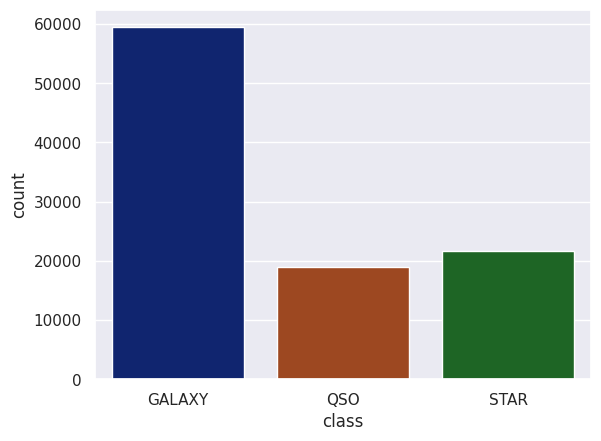

In [14]:
sns.countplot(x = df['class'])
plt.show()

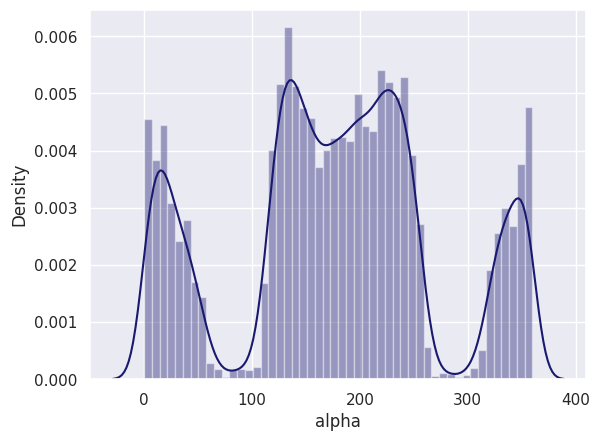

In [15]:
#Biểu đồ phân phối dữ liệu của alpha
sns.distplot(df['alpha'], color="midnightblue")
plt.show()

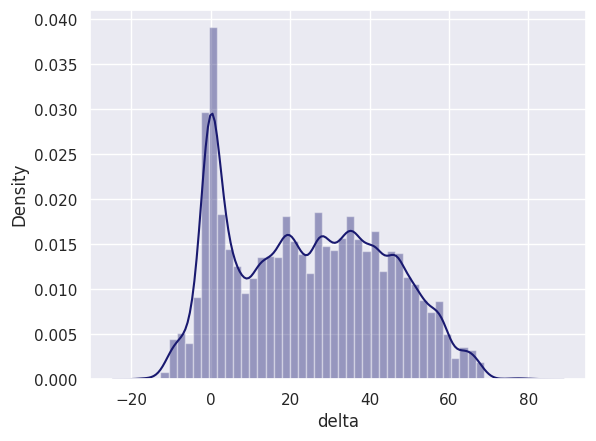

In [16]:
#Biểu đồ phân phối dữ liệu của delta
sns.distplot(df['delta'], color="midnightblue")
plt.show()

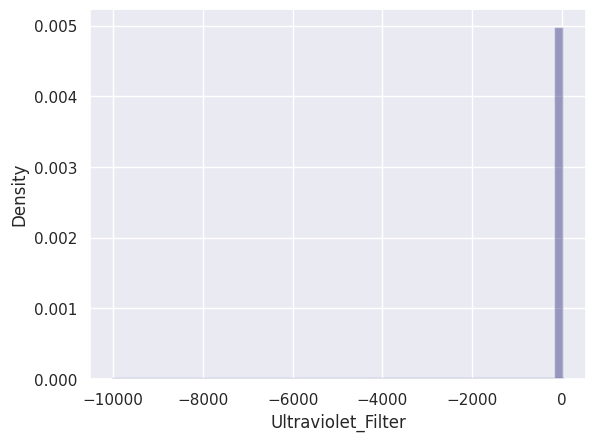

In [17]:
#Biểu đồ phân phối dữ liệu của Ultraviolet_Filter
sns.distplot(df['Ultraviolet_Filter'], color="midnightblue")
plt.show()

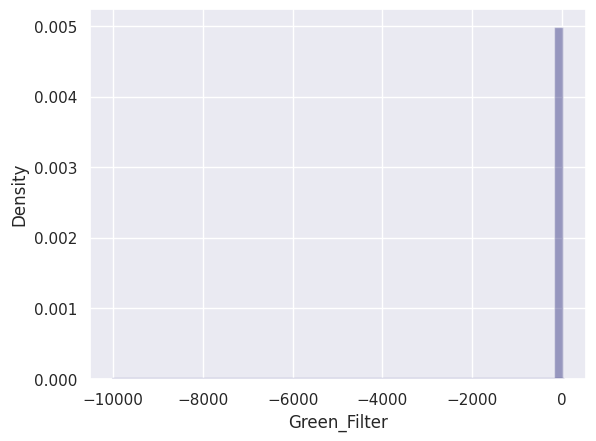

In [18]:
#Biểu đồ phân phối dữ liệu của Green_Filter
sns.distplot(df['Green_Filter'], color="midnightblue")
plt.show()

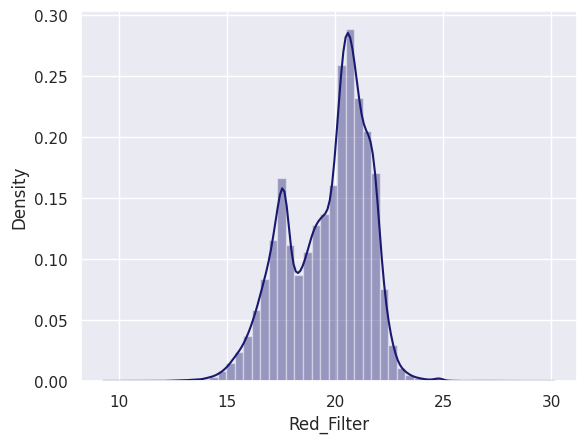

In [19]:
#Biểu đồ phân phối dữ liệu của Red_Filter
sns.distplot(df['Red_Filter'], color="midnightblue")
plt.show()

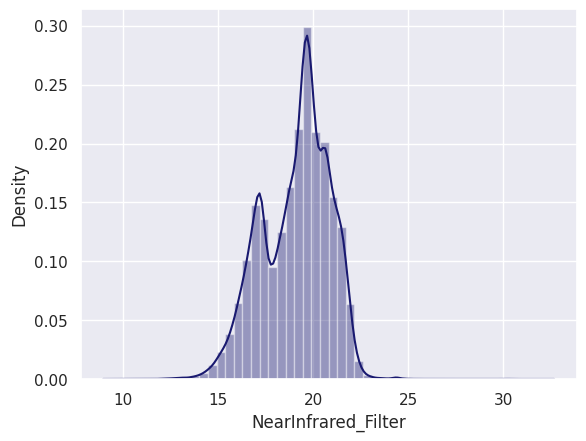

In [20]:
#Biểu đồ phân phối dữ liệu của NearInfrared_Filter
sns.distplot(df['NearInfrared_Filter'], color="midnightblue")
plt.show()

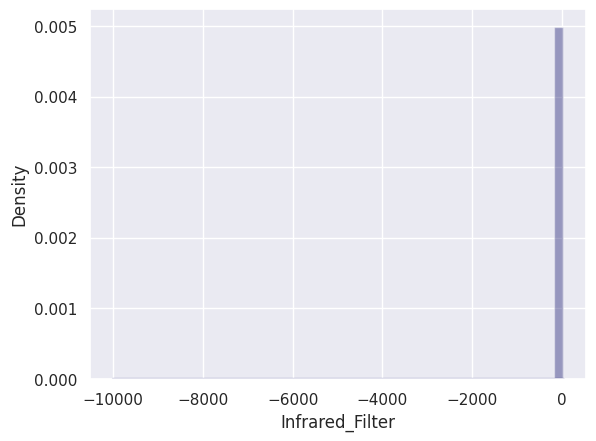

In [21]:
#Biểu đồ phân phối dữ liệu của Infrared_Filter
sns.distplot(df['Infrared_Filter'], color="midnightblue")
plt.show()

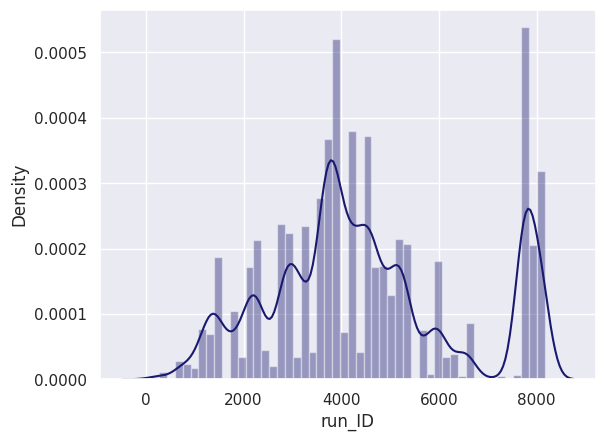

In [22]:
#Biểu đồ phân phối dữ liệu của run_ID
sns.distplot(df['run_ID'], color="midnightblue")
plt.show()

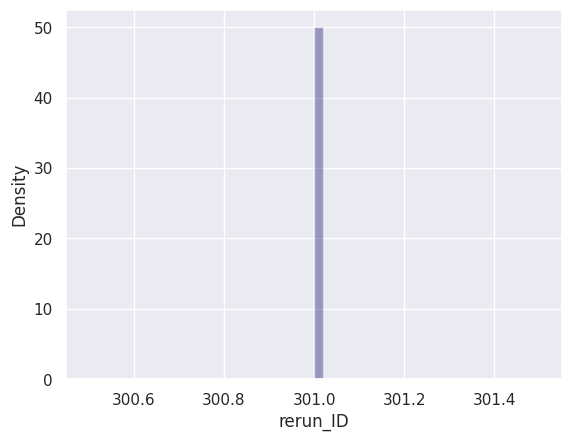

In [23]:
#Biểu đồ phân phối dữ liệu của rereun_ID
sns.distplot(df['rerun_ID'], color="midnightblue")
plt.show()

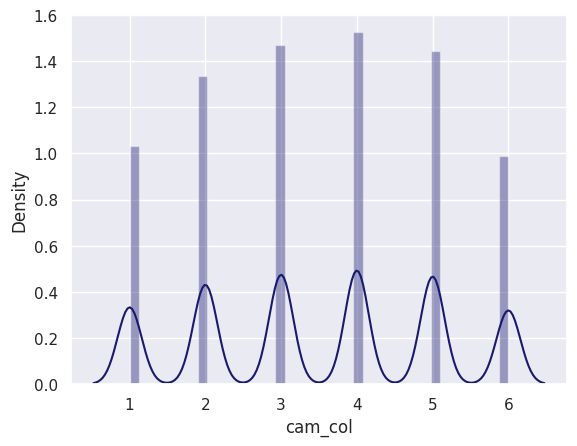

In [24]:
#Biểu đồ phân phối dữ liệu của cam_col
sns.distplot(df['cam_col'], color="midnightblue")
plt.show()

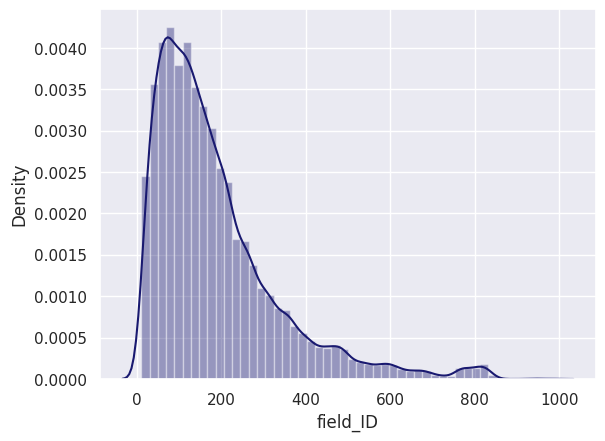

In [25]:
#Biểu đồ phân phối dữ liệu của feild_ID
sns.distplot(df['field_ID'], color="midnightblue")
plt.show()

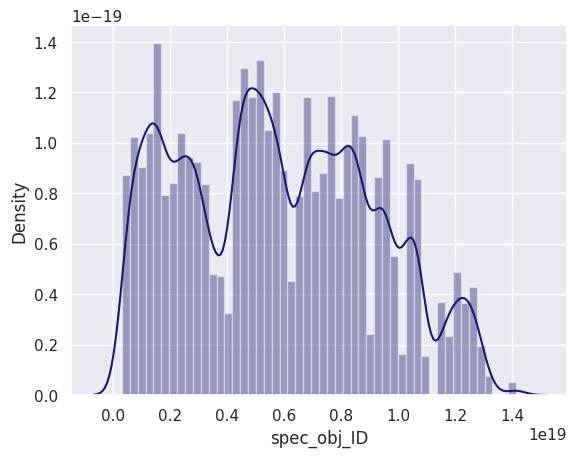

In [26]:
#Biểu đồ phân phối dữ liệu của spec_obj_ID
sns.distplot(df['spec_obj_ID'], color="midnightblue")
plt.show()

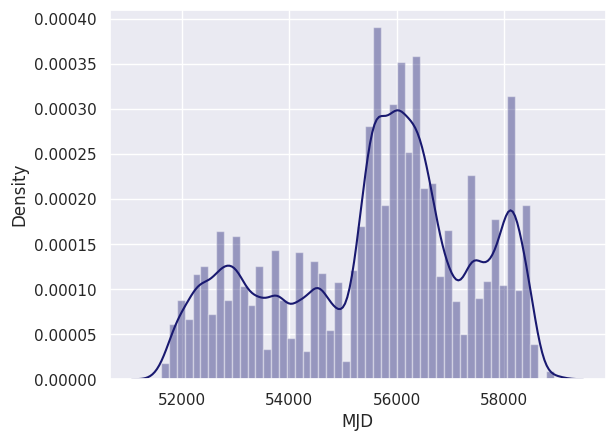

In [27]:
#Biểu đồ phân phối dữ liệu của MJD
sns.distplot(df['MJD'], color="midnightblue")
plt.show()

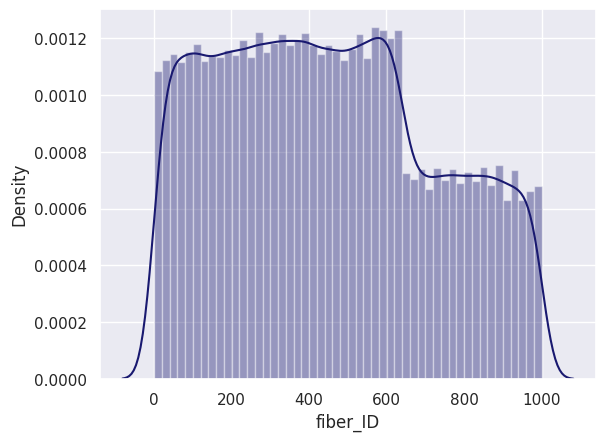

In [28]:
#Biểu đồ phân phối dữ liệu của fiber_ID
sns.distplot(df['fiber_ID'], color="midnightblue")
plt.show()

<Axes: xlabel='redshift', ylabel='Density'>

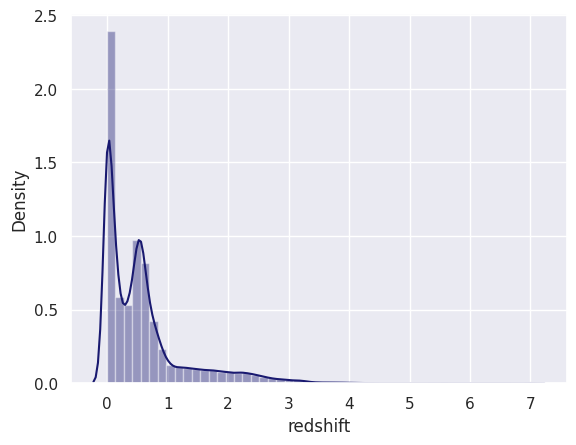

In [29]:
#Biểu đồ phân phối dữ liệu của redshift
sns.distplot(df.redshift, color="midnightblue")

<Axes: xlabel='plate', ylabel='Density'>

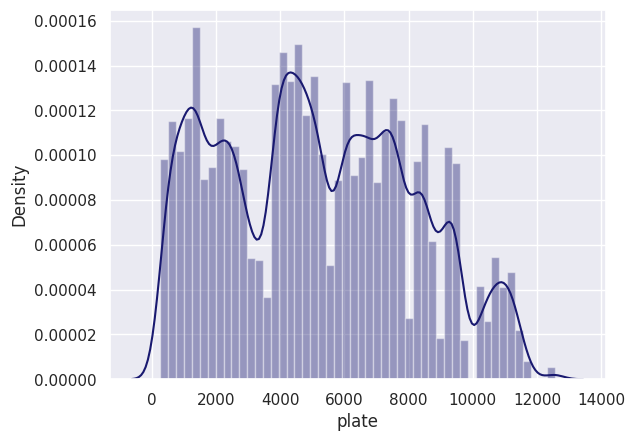

In [30]:
#Biểu đồ phân phối dữ liệu của plate
sns.distplot(df.plate, color="midnightblue")

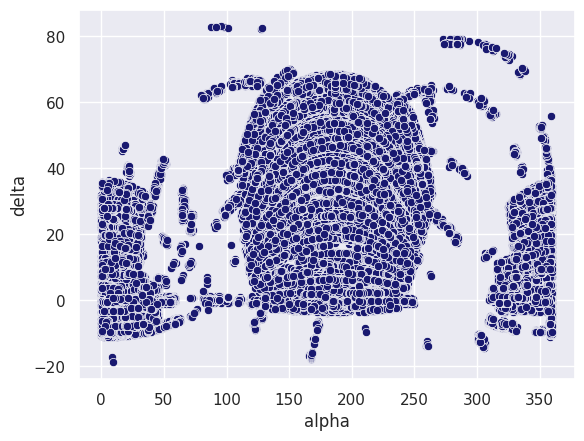

In [31]:
sns.scatterplot(x = df.alpha, y = df.delta, color="midnightblue")
plt.show()

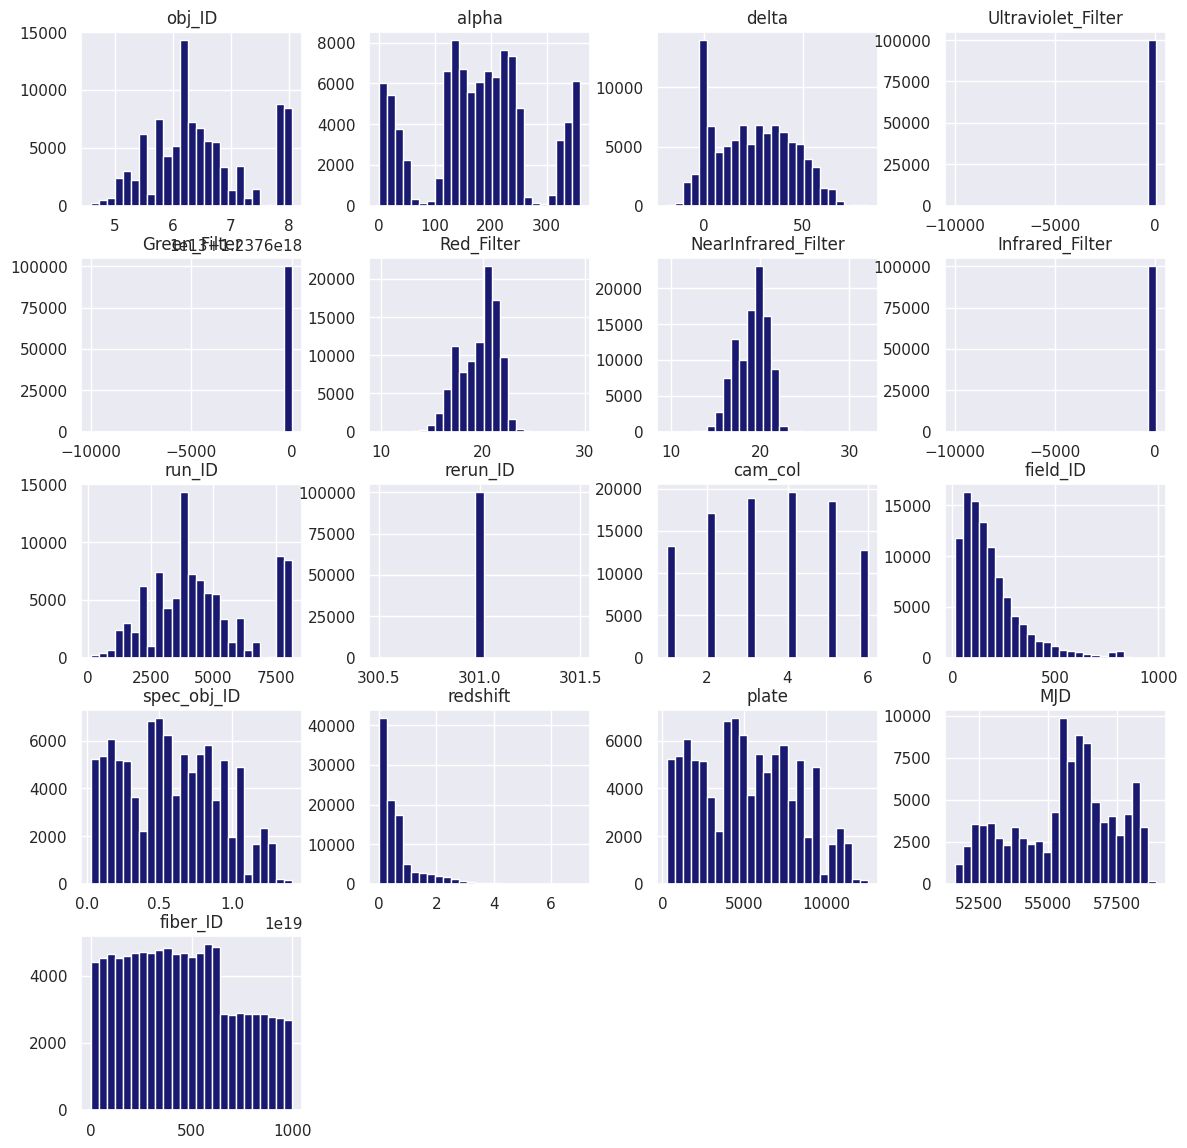

In [32]:
#Display histograms of Numerical Columns
#.hist(): function in Pandas generates separate histograms for each numerical column, providing a visual
# representation of the distribution of values within those columns
df.hist(bins =25 , figsize= (14,14), color="midnightblue")
plt.show()

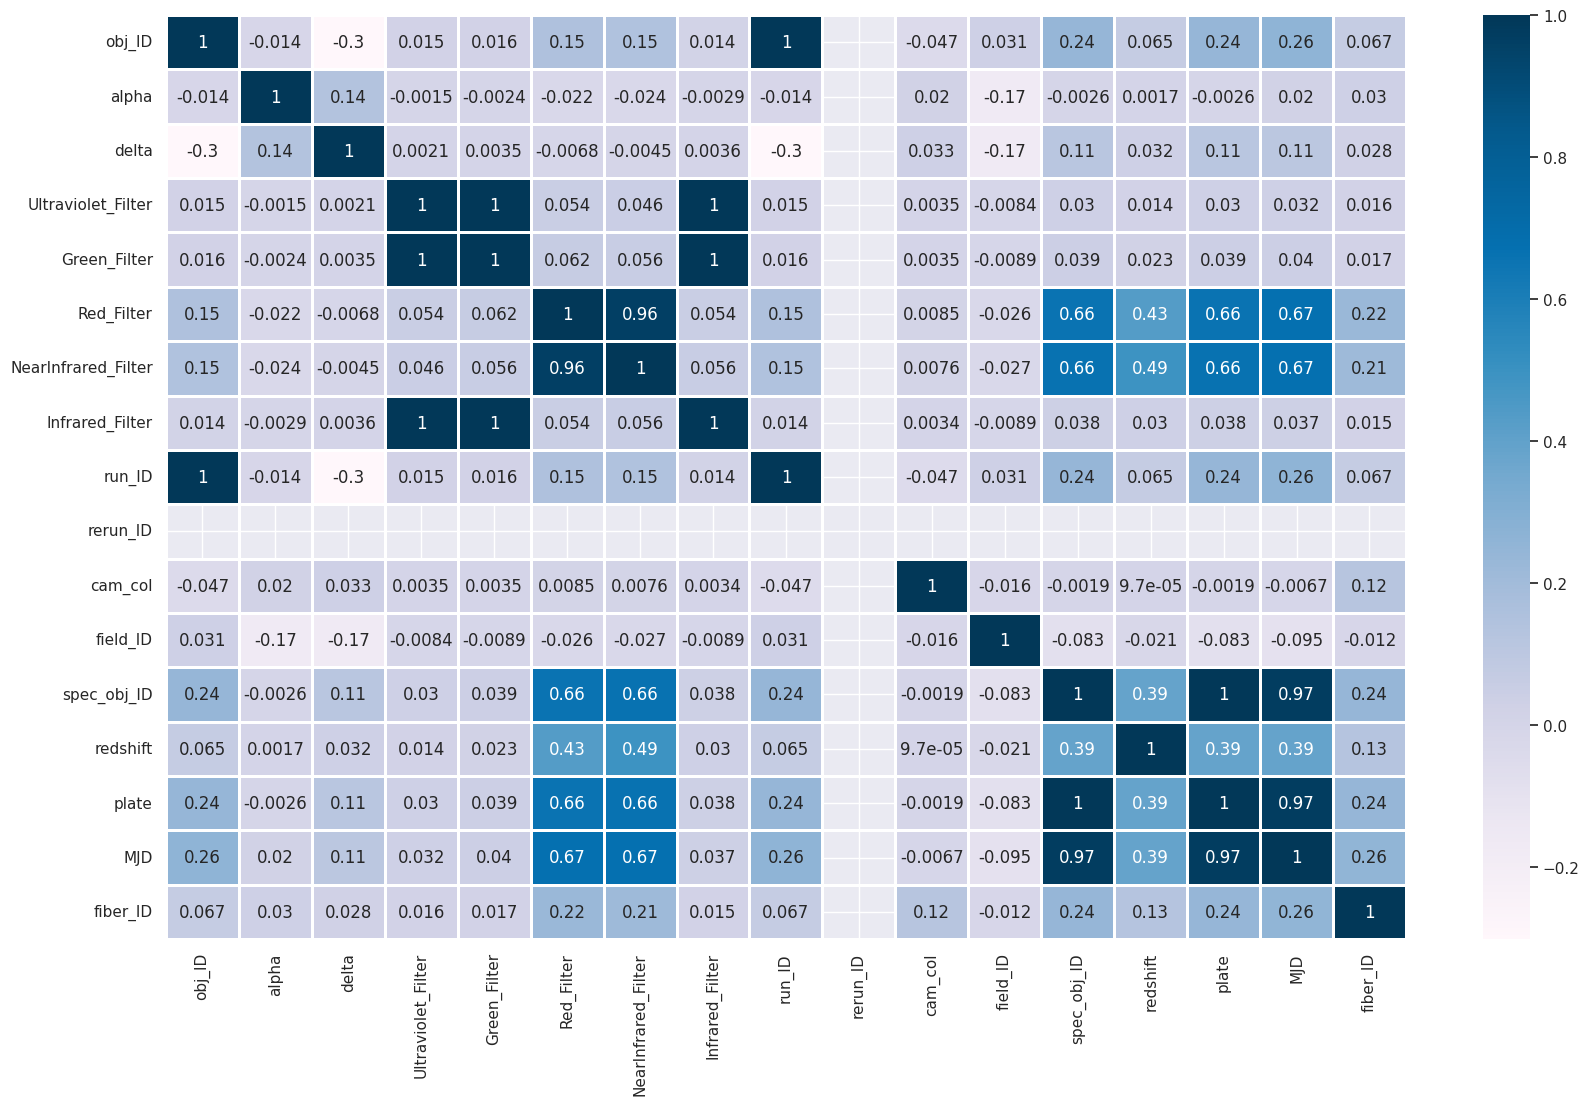

In [33]:
# Heatmap for expressing correlation
#Correlation Matrix(Ma trận tương quan)

fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap="PuBu",linewidths=1)
plt.show()

---
<br>

# **Mã hóa(Encoding):**

In [34]:
# We can either do this, which doesn't involve encoding or we can perform encoding

# Assigning a new value to the 'class' column by using map
#df['class']=df['class'].map({'GALAXY':1,'STAR':0,'QSO':2})
# OR
# we can encode the data

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
#{'GALAXY':0,'STAR':2,'QSO':1}
df['class'] = LE.fit_transform(df['class'])

In [35]:
df['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

---
---
<br>

# **Lựa chọn tính năng(Feature Selection):**

In [36]:
X = df[['Ultraviolet_Filter', 'Green_Filter','Red_Filter', 'NearInfrared_Filter', 'Infrared_Filter', 'redshift', 'plate']]
X

,Ultraviolet_Filter,Green_Filter,Red_Filter,NearInfrared_Filter,Infrared_Filter,redshift,plate
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,5812
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,10445
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,4576
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,9149
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,6121
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,9374
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,7626
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,2764
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040,6751


In [37]:
y = df['class']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

---
---
<br>

# Resampling

In [38]:
#Vì dữ liệu của các đối tượng mục tiêu mất cân bằng cho nên chúng ra cần tạo ra mẫu mới giúp
#cho việc cân bằng các dữ liệu, thuận tiện cho việc phân tích tạo mô hình
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 5)
X_res, y_res = sm.fit_resample(X, y)

In [39]:
y.value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [40]:
y_res.value_counts()

0    59445
1    59445
2    59445
Name: class, dtype: int64

---
---
<br>

# **Phân chia tập dữ liệu(Splitting Dataset):**

In [41]:
#Dùng X_res y_res thay vì X y vì tập dữ liệu ban đầu bị mất cân bằng
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state = 30)

---
---
<br>



  # **2. Phân loại(Classification):**



In [42]:
# Creating the dataframe in which we'll store the accuracy scores of all the classification algorithms so we can choose the best one.

score_df = pd.DataFrame(columns=['Algorithm', 'Recall score'])

---

### **K-Nearest neighbors:**

In [43]:
# Now, we'll create a dataframe where we'll store the recall score of the K Neighbors Classifier algorithm with different values of n_neighbors
# Then, we'll choose the maximum one and consider that as the recall score of the KNN algo. for further use

knn_df = pd.DataFrame(columns=['Neighbors','Recall score'])

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred2 = model.predict(X_test)
    knn_df = knn_df.append({'Neighbors':i, 'Recall score':recall_score(y_test, y_pred2, average='weighted')}, ignore_index=True)

    knn_df

In [45]:
knn_df = knn_df.sort_values(by='Recall score', ascending = False)
knn_df.head()

,Neighbors,Recall score
0,1.0,0.931051
2,3.0,0.914902
1,2.0,0.913579
3,4.0,0.905616
4,5.0,0.903777


Từ đoạn mã ở trên, chúng ta có thể thấy rằng với **n_neighbors = 1** có điểm chính xác( recall_score) cao nhất trong số tất cả các giá trị trong khung dữ liệu. Vì vậy, đối với điểm chính xác cuối cùng của thuật toán KNN, chúng tôi sẽ giữ **n_neighbors = 1**.

In [46]:
# KNN algo for n_neighbors = 1

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

from sklearn.metrics import recall_score
knn_score = recall_score(y_test, y_pred2, average='weighted')
print(f"Recall Score: {knn_score} ")

Recall Score: 0.9310514982953526 


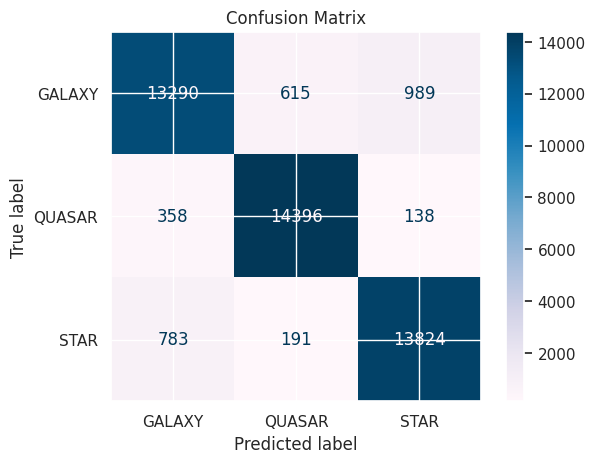

Recall Score: 0.9310514982953526
Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.92      0.89      0.91     14894
      QUASAR       0.95      0.97      0.96     14892
        STAR       0.92      0.93      0.93     14798

    accuracy                           0.93     44584
   macro avg       0.93      0.93      0.93     44584
weighted avg       0.93      0.93      0.93     44584



In [47]:
#Confusion Matrix with n_neighbor = 1
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, cmap = 'cividis',
#                                         display_labels = ['GALAXY', 'QUASAR', 'STAR'])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Assuming you have your predictions in y_pred2 and actual labels in y_test
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['GALAXY', 'QUASAR', 'STAR'])
disp.plot(cmap='PuBu')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
rcall = recall_score(y_test, y_pred2, average = "weighted")
print(f"Recall Score: {rcall}")

# Generate classification report
class_report = classification_report(y_test, y_pred2, target_names=['GALAXY', 'QUASAR', 'STAR'])
print("Classification Report:\n", class_report)

In [48]:
# Adding recall score of the algo to the dataframe

score_df = score_df.append({'Algorithm':'KNN', 'Recall score': knn_score}, ignore_index = True)
score_df

,Algorithm,Recall score
0,KNN,0.931051


---

### **Decision Tree:**

In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 30)
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

dtree_score = recall_score(y_test, y_pred3, average='weighted')
print(f"Recall Score: {dtree_score} ")

Recall Score: 0.9710658532208865 


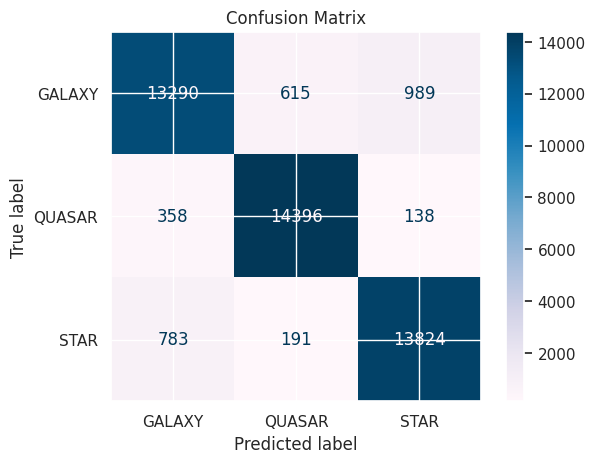

Recall Score: 0.9710658532208865 
Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.96      0.95      0.96     14894
      QUASAR       0.96      0.96      0.96     14892
        STAR       1.00      1.00      1.00     14798

    accuracy                           0.97     44584
   macro avg       0.97      0.97      0.97     44584
weighted avg       0.97      0.97      0.97     44584



In [50]:
#Confusion Matrix
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred3, cmap = 'cividis',
#                                         display_labels = ['GALAXY', 'QUASAR', 'STAR'])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Assuming you have your predictions in y_pred3 and actual labels in y_test
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['GALAXY', 'QUASAR', 'STAR'])
disp.plot(cmap='PuBu')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
rcall = recall_score(y_test, y_pred3, average = "weighted")
print(f"Recall Score: {rcall} ")

# Generate classification report
class_report = classification_report(y_test, y_pred3, target_names=['GALAXY', 'QUASAR', 'STAR'])
print("Classification Report:\n", class_report)

In [51]:
# Adding recall score of the algo to the dataframe

score_df = score_df.append({'Algorithm':'Decision Tree', 'Recall score':dtree_score}, ignore_index = True)
score_df

,Algorithm,Recall score
0,KNN,0.931051
1,Decision Tree,0.971066


---

# **Gaussian Naive Bayes**

In [52]:
#Khai báo thư viện GaussianNB từ sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

#Tạo ra mô hình dữ liệu dựa trên tập dữ liệu huấn luyện đã chia
model = GaussianNB()
model.fit(X_train, y_train)

y_pred4 = model.predict(X_test)
#Kết quả dự đoán được tạo ra và đem so sánh với giá trị thực y_test để tìm ra độ chính xác
gnb_score = recall_score(y_test, y_pred4, average = 'weighted')
gnb_score

0.6041853579759555

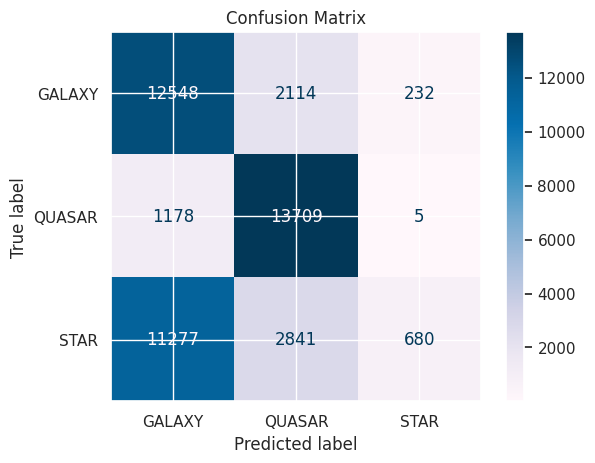

Recall Score: 0.6041853579759555 
Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.50      0.84      0.63     14894
      QUASAR       0.73      0.92      0.82     14892
        STAR       0.74      0.05      0.09     14798

    accuracy                           0.60     44584
   macro avg       0.66      0.60      0.51     44584
weighted avg       0.66      0.60      0.51     44584



In [53]:
#Confusion Matrix
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred4, cmap = 'cividis',
#                                         display_labels = ['GALAXY', 'QUASAR', 'STAR'])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Assuming you have your predictions in y_pred4 and actual labels in y_test
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred4)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['GALAXY', 'QUASAR', 'STAR'])
disp.plot(cmap='PuBu')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
rcall = recall_score(y_test, y_pred4, average = "weighted")
print(f"Recall Score: {rcall} ")

# Generate classification report
class_report = classification_report(y_test, y_pred4, target_names=['GALAXY', 'QUASAR', 'STAR'])
print("Classification Report:\n", class_report)

In [54]:
# Adding accuracy score of the algo to the dataframe

score_df = score_df.append({'Algorithm':'GaussianNB', 'Recall score': gnb_score}, ignore_index = True)
score_df

,Algorithm,Recall score
0,KNN,0.931051
1,Decision Tree,0.971066
2,GaussianNB,0.604185


---

### **Random Forest(Rừng ngẫu nhiên):**

In [55]:
# Now, we'll create a dataframe where we'll store the recall score of the Random Forest Classifier algorithm with different values of n_estimators
# Then, we'll choose the maximum one and consider that as the recall score of the KNN algo. for further use

rf_df = pd.DataFrame(columns=['Estimators','Recall score'])

In [56]:
from sklearn.ensemble import RandomForestClassifier

for i in range(1,21):
    model = RandomForestClassifier(n_estimators = i, random_state = 30)
    model.fit(X_train, y_train)
    y_pred5 = model.predict(X_test)
    rf_df = rf_df.append({'Estimators':i, 'Recall score':recall_score(y_test, y_pred5, average = 'weighted')},
                         ignore_index = True)

rf_df

,Estimators,Recall score
0,1.0,0.966602
1,2.0,0.968374
2,3.0,0.977772
3,4.0,0.978221
4,5.0,0.979836
5,6.0,0.979970
6,7.0,0.980666
7,8.0,0.980688
8,9.0,0.981069
9,10.0,0.981316


In [57]:
rf_df = rf_df.sort_values(by='Recall score', ascending = False)
rf_df.head()

,Estimators,Recall score
17,18.0,0.982011
19,20.0,0.981967
15,16.0,0.981899
18,19.0,0.981810
14,15.0,0.981810


Từ đoạn mã ở trên, chúng ta có thể thấy rằng với **n_estimators = 18** có điểm thu hồi(recall_score) cao nhất trong số tất cả các giá trị trong khung dữ liệu. Vì vậy, đối với điểm thu hồi cuối cùng của thuật toán Phân loại rừng ngẫu nhiên, chúng tôi sẽ giữ **n_estimators = 18.**

In [58]:
# Random Forest algo for n_estimators = 18
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 18, random_state = 30)
model.fit(X_train, y_train)
y_pred5 = model.predict(X_test)

from sklearn.metrics import recall_score
rf_score = recall_score(y_test, y_pred5, average = 'weighted')
rf_score

0.982011483940427

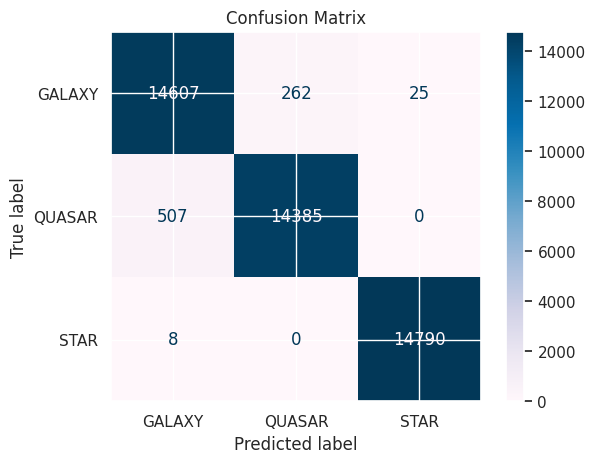

Recall Score: 0.982011483940427 
Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.97     14894
      QUASAR       0.98      0.97      0.97     14892
        STAR       1.00      1.00      1.00     14798

    accuracy                           0.98     44584
   macro avg       0.98      0.98      0.98     44584
weighted avg       0.98      0.98      0.98     44584



In [59]:
#Confusion Matrix
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred5, cmap = 'cividis',
#                                         display_labels = ['GALAXY', 'QUASAR', 'STAR'])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Assuming you have your predictions in y_pred2 and actual labels in y_test
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred5)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['GALAXY', 'QUASAR', 'STAR'])
disp.plot(cmap='PuBu')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy
rcall = recall_score(y_test, y_pred5, average = "weighted")
print(f"Recall Score: {rcall} ")

# Generate classification report
class_report = classification_report(y_test, y_pred5, target_names=['GALAXY', 'QUASAR', 'STAR'])
print("Classification Report:\n", class_report)

In [60]:
# Adding accuracy score of the algo to the dataframe

score_df = score_df.append({'Algorithm':'Random Forest', 'Recall score': rf_score}, ignore_index = True)
score_df

,Algorithm,Recall score
0,KNN,0.931051
1,Decision Tree,0.971066
2,GaussianNB,0.604185
3,Random Forest,0.982011


---

# **Mô hình có hiệu suất cao nhất**

In [61]:
score_df = score_df.set_index('Recall score')
score_df

,Algorithm
Recall score,
0.931051,KNN
0.971066,Decision Tree
0.604185,GaussianNB
0.982011,Random Forest


In [62]:
score_df = score_df.sort_values(by = 'Recall score', ascending = False)
score_df

,Algorithm
Recall score,
0.982011,Random Forest
0.971066,Decision Tree
0.931051,KNN
0.604185,GaussianNB


Sau khi phân tích và đánh giá cẩn thận các mô hình khác nhau, thuật toán **Random Forest** nổi lên là mô hình hoạt động tốt nhất về độ chính xác và hiệu suất dự đoán. Vì vậy, tôi đã quyết định sử dụng bộ phân loại **Random Forest** để huấn luyện mô hình của mình.



---



# **Huấn luyện với mô hình tốt nhất và siêu tham số:**

In [63]:
model = RandomForestClassifier(n_estimators=18, max_depth=None)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=18)

# **Tạo dự đoán:**

In [64]:
prediction = model.predict(X_test)

# **Tính năng quan trọng:**

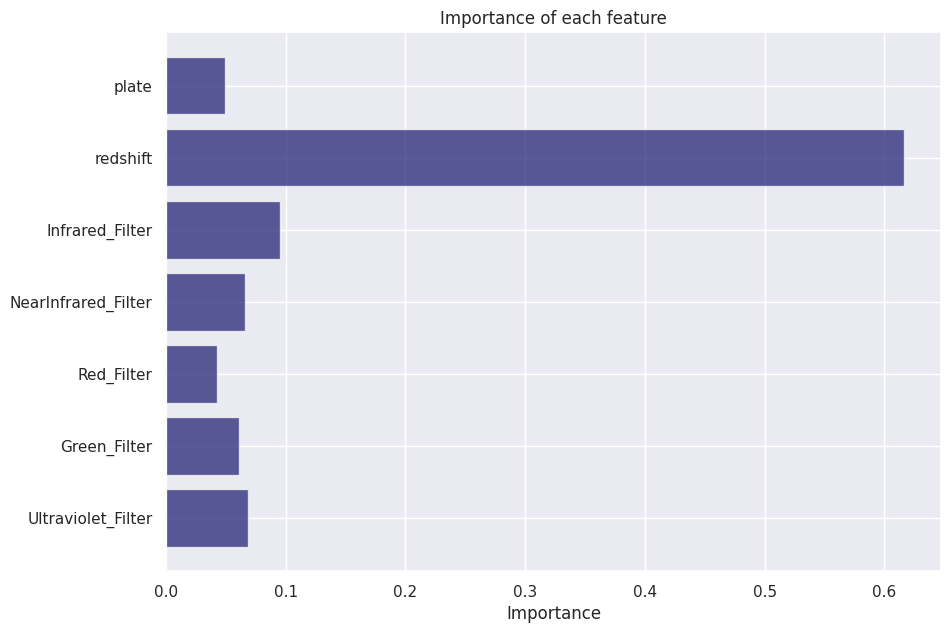

In [65]:
feature_names = ['Ultraviolet_Filter', 'Green_Filter','Red_Filter', 'NearInfrared_Filter', 'Infrared_Filter', 'redshift', 'plate']
feature_importances = model.feature_importances_

f, ax = plt.subplots(figsize=(10, 7))
ax.barh(range(len(feature_importances)), feature_importances, color='midnightblue', alpha=.7)
ax.set_yticks(range(len(feature_importances)))
ax.set_yticklabels(feature_names)
ax.set_title("Importance of each feature")
ax.set_xlabel("Importance")
plt.show()

Dựa vào biểu đồ trên, giá trị **redshift** là tính năng vượt trội về tầm quan trọng, tiếp theo là **Infrared_ilter** và **Green_Filter**



---



# **Classification Report:**
Xác định hiệu suất của mô hình bằng cách sử dụng một số số liệu đánh giá hiệu suất(accuracy, precision, recall, f1_score, support).

In [66]:
print(classification_report(y_test, prediction, digits=5))

              precision    recall  f1-score   support

           0    0.96574   0.97858   0.97212     14894
           1    0.98090   0.96562   0.97320     14892
           2    0.99737   0.99966   0.99852     14798

    accuracy                        0.98125     44584
   macro avg    0.98134   0.98129   0.98128     44584
weighted avg    0.98130   0.98125   0.98124     44584



# **Confusion Matrix:**

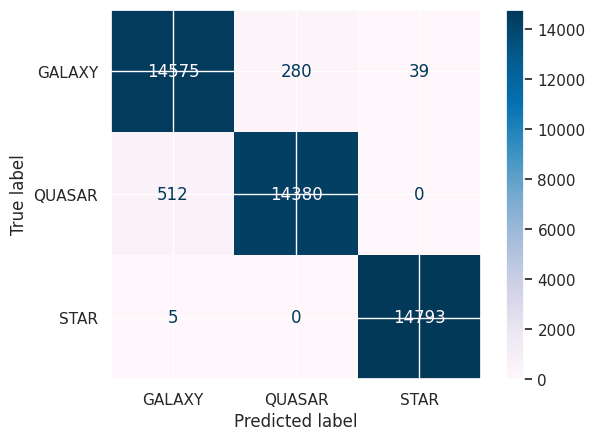

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test, prediction, cmap = 'PuBu',
                                        display_labels = ['GALAXY', 'QUASAR', 'STAR'])

Sau quá trình phân loại thì Random Forest là thuật toán phù hợp nhất với bài toán Stellar Classification và redshift là thuộc tính quan trọng, ảnh hưởng trực tiếp đến kết qu



---

